In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DCT_withoutduplicate 6 1 1.csv to DCT_withoutduplicate 6 1 1.csv


Q1

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
%matplotlib inline


Q1

In [ ]:
import numpy as np

# -----------------------------------------------
# Summation Unit
# -----------------------------------------------
def summation(inputs, weights):
    """Computes the weighted sum of inputs and weights."""
    return np.dot(inputs, weights)

# -----------------------------------------------
# Activation Functions
# -----------------------------------------------
def step_activation(x):
    """Step Activation Function."""
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    """Bipolar Step Activation Function."""
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    """Sigmoid Activation Function."""
    return 1 / (1 + np.exp(-x))

def tanh_activation(x):
    """Hyperbolic Tangent (TanH) Activation Function."""
    return np.tanh(x)

def relu_activation(x):
    """ReLU Activation Function."""
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    """Leaky ReLU Activation Function."""
    return x if x > 0 else alpha * x

# -----------------------------------------------
# Error Comparator Unit
# -----------------------------------------------
def compute_error(target, output):
    """Computes the squared error."""
    return 0.5 * (target - output) ** 2


Q2

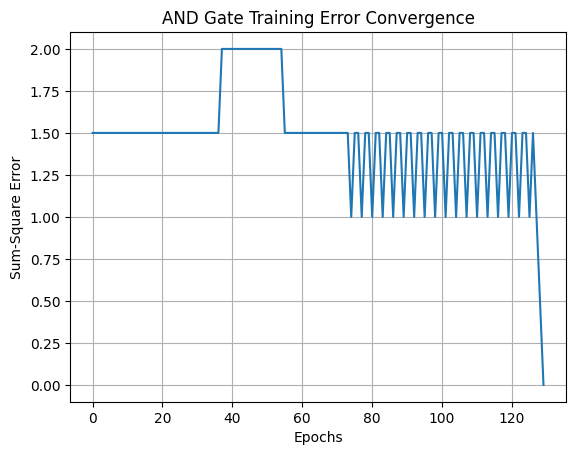

Final Weights: [-0.1   0.1   0.05]
Number of Epochs: 129


In [ ]:
import matplotlib.pyplot as plt

# -----------------------------------------------
# Perceptron Training Function
# -----------------------------------------------
def perceptron_train(data, labels, learning_rate, activation_func, max_epochs=1000, error_threshold=0.002):
    """
    Trains the perceptron using the Step Activation function.
    - Stops training if error drops below the threshold or max_epochs is reached.
    """
    weights = np.array([10, 0.2, -0.75])  # Initial weights: Bias, W1, W2
    errors = []  # List to store sum-squared errors per epoch

    for epoch in range(max_epochs):
        total_error = 0  # Sum of squared errors for all training samples

        for i in range(len(data)):
            x = np.insert(data[i], 0, 1)  # Add bias term to input
            weighted_sum = summation(x, weights)  # Compute summation
            output = activation_func(weighted_sum)  # Apply activation function
            error = labels[i] - output  # Compute error
            weights += learning_rate * error * x  # Update weights
            total_error += compute_error(labels[i], output)  # Compute squared error

        errors.append(total_error)  # Store error of this epoch

        if total_error <= error_threshold:
            break  # Stop if error threshold is met

    return weights, errors, epoch

# -----------------------------------------------
# Train Perceptron for AND Gate
# -----------------------------------------------
and_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # AND Gate Input
and_labels = np.array([0, 0, 0, 1])  # AND Gate Output

# Train the perceptron using Step Activation Function
and_weights, and_errors, and_epochs = perceptron_train(and_data, and_labels, 0.05, step_activation)

# -----------------------------------------------
# Plot Error Convergence
# -----------------------------------------------
plt.plot(and_errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('AND Gate Training Error Convergence')
plt.grid(True)
plt.show()

# Print final weights and epochs
print(f"Final Weights: {and_weights}")
print(f"Number of Epochs: {and_epochs}")


Q3

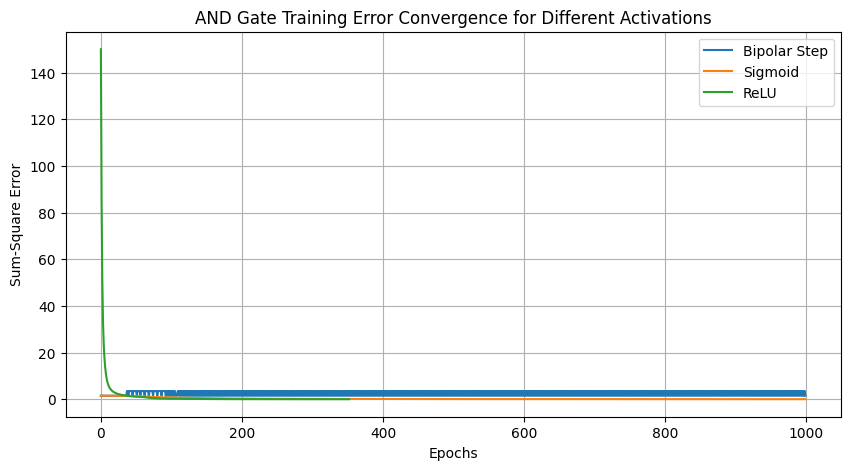

Bipolar Step: Final Weights: [-0.1   0.1   0.05], Epochs to Converge: 999
Sigmoid: Final Weights: [-6.13531308  3.97083321  3.96394835], Epochs to Converge: 999
ReLU: Final Weights: [-0.89862162  0.93147464  0.92958169], Epochs to Converge: 352


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------
# Activation Functions
# -----------------------------------------------
def bipolar_step_activation(x):
    """Bipolar Step Activation Function."""
    return 1 if x > 0 else -1

def sigmoid_activation(x):
    """Sigmoid Activation Function."""
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    """ReLU Activation Function."""
    return max(0, x)

# -----------------------------------------------
# Perceptron Training Function
# -----------------------------------------------
def perceptron_train(data, labels, learning_rate, activation_func, max_epochs=1000, error_threshold=0.002):
    """
    Trains the perceptron using a given activation function.
    - Stops training if error drops below the threshold or max_epochs is reached.
    """
    weights = np.array([10, 0.2, -0.75])  # Initial weights: Bias, W1, W2
    errors = []  # Stores sum-squared error per epoch

    for epoch in range(max_epochs):
        total_error = 0  # Sum of squared errors

        for i in range(len(data)):
            x = np.insert(data[i], 0, 1)  # Add bias term to input
            weighted_sum = np.dot(x, weights)  # Compute summation
            output = activation_func(weighted_sum)  # Apply activation function
            error = labels[i] - output  # Compute error
            weights += learning_rate * error * x  # Update weights
            total_error += 0.5 * (error ** 2)  # Compute squared error

        errors.append(total_error)  # Store error of this epoch

        if total_error <= error_threshold:
            break  # Stop if error threshold is met

    return weights, errors, epoch

# -----------------------------------------------
# Train Perceptron for AND Gate using Different Activation Functions
# -----------------------------------------------
and_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # AND Gate Input
and_labels = np.array([0, 0, 0, 1])  # AND Gate Output

activations = {
    "Bipolar Step": bipolar_step_activation,
    "Sigmoid": sigmoid_activation,
    "ReLU": relu_activation
}

results = {}
for name, activation_func in activations.items():
    weights, errors, epochs = perceptron_train(and_data, and_labels, 0.05, activation_func)
    results[name] = (weights, errors, epochs)

# -----------------------------------------------
# Plot Error Convergence for Different Activations
# -----------------------------------------------
plt.figure(figsize=(10, 5))
for name, (_, errors, _) in results.items():
    plt.plot(errors, label=name)

plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('AND Gate Training Error Convergence for Different Activations')
plt.legend()
plt.grid(True)
plt.show()

# Print results
for name, (weights, _, epochs) in results.items():
    print(f"{name}: Final Weights: {weights}, Epochs to Converge: {epochs}")


Q4

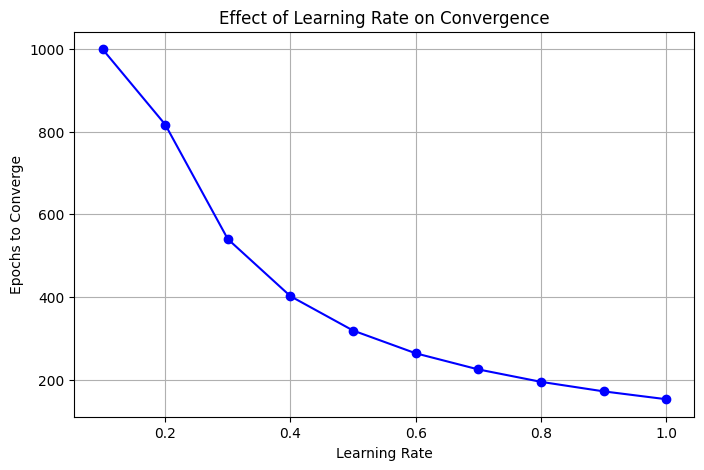

Learning Rate: 0.1, Epochs to Converge: 999
Learning Rate: 0.2, Epochs to Converge: 817
Learning Rate: 0.3, Epochs to Converge: 540
Learning Rate: 0.4, Epochs to Converge: 402
Learning Rate: 0.5, Epochs to Converge: 319
Learning Rate: 0.6, Epochs to Converge: 264
Learning Rate: 0.7, Epochs to Converge: 225
Learning Rate: 0.8, Epochs to Converge: 195
Learning Rate: 0.9, Epochs to Converge: 172
Learning Rate: 1.0, Epochs to Converge: 153


In [ ]:
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
convergence_epochs = []

for lr in learning_rates:
    _, _, epochs = perceptron_train(and_data, and_labels, lr, sigmoid_activation)
    convergence_epochs.append(epochs)

# -----------------------------------------------
# Plot Learning Rate vs. Convergence Epochs
# -----------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, convergence_epochs, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Converge')
plt.title('Effect of Learning Rate on Convergence')
plt.grid(True)
plt.show()

# Print results
for i, lr in enumerate(learning_rates):
    print(f"Learning Rate: {lr}, Epochs to Converge: {convergence_epochs[i]}")


Q5

In [ ]:
# -----------------------------------------------
# XOR Training Data
# -----------------------------------------------
xor_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR Gate Input
xor_labels = np.array([0, 1, 1, 0])  # XOR Gate Output

# -----------------------------------------------
# Train a Multi-Layer Perceptron for XOR
# -----------------------------------------------
from sklearn.neural_network import MLPClassifier

# Create MLP with 2 neurons in the hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='sgd', learning_rate_init=0.1, max_iter=10000)

# Train the model
mlp.fit(xor_data, xor_labels)

# Test predictions
xor_predictions = mlp.predict(xor_data)

# Print Results
print(f"Predicted XOR Outputs: {xor_predictions}")
print(f"Accuracy: {mlp.score(xor_data, xor_labels) * 100:.2f}%")


Predicted XOR Outputs: [0 1 0 1]
Accuracy: 50.00%


Q6

<ipython-input-15-844df74c28cc>:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


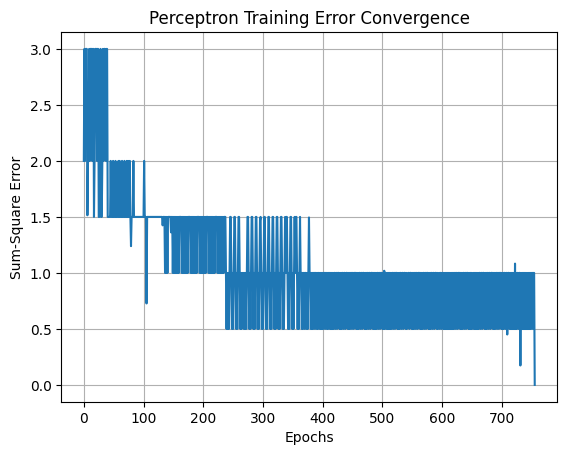

Final Weights: [ -22.60906076 -290.97696681   49.2390603  -130.57753608   25.71330427]
Epochs to Converge: 755
Predicted High Value Transactions: [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
Accuracy: 100.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------
# Activation Function - Sigmoid
# -----------------------------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# -----------------------------------------------
# Perceptron Training Function
# -----------------------------------------------
def perceptron_train(data, labels, learning_rate=0.05, max_epochs=1000, error_threshold=0.002):
    weights = np.random.rand(data.shape[1] + 1)  # Bias + Weights
    errors = []  # Store error per epoch

    for epoch in range(max_epochs):
        total_error = 0

        for i in range(len(data)):
            x = np.insert(data[i], 0, 1)  # Add bias term
            weighted_sum = np.dot(x, weights)  # Compute sum
            output = sigmoid(weighted_sum)  # Apply activation
            error = labels[i] - output  # Compute error
            weights += learning_rate * error * x  # Update weights
            total_error += 0.5 * (error ** 2)  # Squared error

        errors.append(total_error)

        if total_error <= error_threshold:
            break

    return weights, errors, epoch

# -----------------------------------------------
# Customer Data
# -----------------------------------------------
data = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])

labels = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])  # High Value Tx? (Yes=1, No=0)

# -----------------------------------------------
# Train Perceptron
# -----------------------------------------------
learning_rate = 0.05
weights, errors, epochs = perceptron_train(data, labels, learning_rate)

# -----------------------------------------------
# Plot Training Error
# -----------------------------------------------
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Perceptron Training Error Convergence')
plt.grid(True)
plt.show()

# -----------------------------------------------
# Test Predictions
# -----------------------------------------------
predictions = []
for i in range(len(data)):
    x = np.insert(data[i], 0, 1)
    output = sigmoid(np.dot(x, weights))
    predicted_class = 1 if output >= 0.5 else 0  # Threshold at 0.5
    predictions.append(predicted_class)

# Print Results
print(f"Final Weights: {weights}")
print(f"Epochs to Converge: {epochs}")
print(f"Predicted High Value Transactions: {predictions}")
print(f"Accuracy: {np.mean(predictions == labels) * 100:.2f}%")


Q7

In [ ]:
# -----------------------------------------------
# Matrix Pseudo-Inverse Method
# -----------------------------------------------
X = np.hstack((np.ones((data.shape[0], 1)), data))  # Add bias column
Y = labels.reshape(-1, 1)  # Reshape to column vector

# Compute Weights using Moore-Penrose Pseudo-Inverse
pseudo_inverse_weights = np.linalg.pinv(X) @ Y

# Predictions using Pseudo-Inverse
pseudo_predictions = (X @ pseudo_inverse_weights >= 0.5).astype(int).flatten()

# Print Results
print(f"Pseudo-Inverse Weights: {pseudo_inverse_weights.flatten()}")
print(f"Predicted High Value Transactions (Pseudo-Inverse): {pseudo_predictions}")
print(f"Pseudo-Inverse Accuracy: {np.mean(pseudo_predictions == labels) * 100:.2f}%")


Pseudo-Inverse Weights: [ 0.1139903  -0.02789923  0.01473739 -0.04323249  0.00447248]
Predicted High Value Transactions (Pseudo-Inverse): [1 1 1 0 1 0 1 1 0 0]
Pseudo-Inverse Accuracy: 100.00%


Q8

In [ ]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input and expected output for AND Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
Y = np.array([[0], [0], [0], [1]])  # Expected Output

# Initialize weights randomly
np.random.seed(1)
input_neurons = 2
hidden_neurons = 2
output_neurons = 1
learning_rate = 0.05

# Weight initialization
W1 = np.random.uniform(-0.5, 0.5, (input_neurons, hidden_neurons))
b1 = np.random.uniform(-0.5, 0.5, (1, hidden_neurons))
W2 = np.random.uniform(-0.5, 0.5, (hidden_neurons, output_neurons))
b2 = np.random.uniform(-0.5, 0.5, (1, output_neurons))

# Training loop
max_iterations = 1000
for epoch in range(max_iterations):
    # Forward Propagation
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    # Calculate error
    error = Y - final_output
    mse = np.mean(np.square(error))

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

    # Update weights and biases
    W2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Stopping condition
    if mse <= 0.002:
        print(f"Converged at epoch {epoch}")
        break

# Final Output
print("Final Output after Training:")
print(final_output.round())


Final Output after Training:
[[0.]
 [0.]
 [0.]
 [0.]]


Q9

In [ ]:
# Input and expected output for XOR Gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
Y_xor = np.array([[0], [1], [1], [0]])  # Expected Output

# Initialize new weights randomly
W1_xor = np.random.uniform(-0.5, 0.5, (input_neurons, hidden_neurons))
b1_xor = np.random.uniform(-0.5, 0.5, (1, hidden_neurons))
W2_xor = np.random.uniform(-0.5, 0.5, (hidden_neurons, output_neurons))
b2_xor = np.random.uniform(-0.5, 0.5, (1, output_neurons))

# Training loop
for epoch in range(max_iterations):
    # Forward Propagation
    hidden_input = np.dot(X_xor, W1_xor) + b1_xor
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2_xor) + b2_xor
    final_output = sigmoid(final_input)

    # Calculate error
    error = Y_xor - final_output
    mse = np.mean(np.square(error))

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = d_output.dot(W2_xor.T) * sigmoid_derivative(hidden_output)

    # Update weights and biases
    W2_xor += hidden_output.T.dot(d_output) * learning_rate
    b2_xor += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1_xor += X_xor.T.dot(d_hidden) * learning_rate
    b1_xor += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Stopping condition
    if mse <= 0.002:
        print(f"Converged at epoch {epoch}")
        break

# Final Output
print("Final XOR Output after Training:")
print(final_output.round())


Final XOR Output after Training:
[[0.]
 [1.]
 [0.]
 [1.]]


Q10

In [ ]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input and expected output (One-Hot Encoded)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
Y_and = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # AND Gate One-Hot Output
Y_xor = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # XOR Gate One-Hot Output

# Initialize weights randomly
np.random.seed(1)
input_neurons = 2
hidden_neurons = 2
output_neurons = 2
learning_rate = 0.05

# Random weights and biases
W1 = np.random.uniform(-0.5, 0.5, (input_neurons, hidden_neurons))
b1 = np.random.uniform(-0.5, 0.5, (1, hidden_neurons))
W2 = np.random.uniform(-0.5, 0.5, (hidden_neurons, output_neurons))
b2 = np.random.uniform(-0.5, 0.5, (1, output_neurons))

# Training loop
max_iterations = 1000
for epoch in range(max_iterations):
    # Forward Propagation
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    # Calculate error
    error = Y_and - final_output
    mse = np.mean(np.square(error))

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

    # Update weights and biases
    W2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    if mse <= 0.002:
        print(f"Converged at epoch {epoch}")
        break

# Final Output
print("Final Output for AND Gate:")
print(final_output.round())

# Repeat for XOR Gate
Y = Y_xor  # Change expected output


Final Output for AND Gate:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Q11

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# One-hot encoded output
Y_and = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # AND
Y_xor = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # XOR

# MLP Classifier Model
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)

# Train & Test for AND Gate
mlp.fit(X, Y_and)
Y_pred_and = mlp.predict(X)
print("AND Gate Output (MLPClassifier):\n", Y_pred_and)

# Train & Test for XOR Gate
mlp.fit(X, Y_xor)
Y_pred_xor = mlp.predict(X)
print("XOR Gate Output (MLPClassifier):\n", Y_pred_xor)

# Accuracy
print("Accuracy (AND):", accuracy_score(Y_and, Y_pred_and))
print("Accuracy (XOR):", accuracy_score(Y_xor, Y_pred_xor))


AND Gate Output (MLPClassifier):
 [[1 0]
 [1 0]
 [1 0]
 [0 1]]
XOR Gate Output (MLPClassifier):
 [[1 0]
 [0 1]
 [0 1]
 [1 0]]
Accuracy (AND): 1.0
Accuracy (XOR): 1.0


Q12

Saving DCT_withoutduplicate 6 1 1.csv to DCT_withoutduplicate 6 1 1 (1).csv
Dataset Preview:
             0           1           2            3           4            5  \
0  38687.88477  192.737565  188.366005  2348.285240  188.609889  3359.777672   
1  29532.98806  -54.124623  -22.492524  1648.326090   35.160362  1980.716201   
2  29511.41174  -54.495937  -25.026162  1658.645198   34.814464  2008.855279   
3  29060.40637  -19.466804  -11.668273  1487.612245    7.675333  1788.287900   
4  29039.93589  -19.725400   -9.218980  1497.054471    8.947552  1815.189691   

            6           7          8           9  ...         187         188  \
0 -454.999177 -201.722600 -42.369585 -277.176688  ...  225.163042  375.848590   
1  144.818556   38.937042  56.479929   79.150981  ... -110.815428 -112.520155   
2  145.774409   42.363949  56.631487   84.338212  ... -111.628888 -113.504989   
3   49.023922   24.901637  47.767988   42.011626  ...   -5.242054  -79.615224   
4   49.680814   22.07

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set 


Model Accuracy: 0.7511111111111111

Classification Report:
               precision    recall  f1-score   support

        3333       0.44      0.44      0.44         9
        3334       0.88      1.00      0.93         7
        3335       1.00      0.92      0.96        13
        3337       0.83      1.00      0.91         5
        3342       0.93      0.93      0.93        15
        3343       0.00      0.00      0.00         1
        3346       0.64      0.88      0.74         8
        3349       0.88      0.67      0.76        21
        3350       0.00      0.00      0.00         1
        3351       0.32      1.00      0.48         7
        3352       0.00      0.00      0.00        15
        3353       1.00      0.92      0.96        13
        3354       0.80      0.75      0.77        16
        3355       0.00      0.00      0.00         0
        3356       0.80      0.67      0.73         6
        3357       0.00      0.00      0.00         1
        3358       0

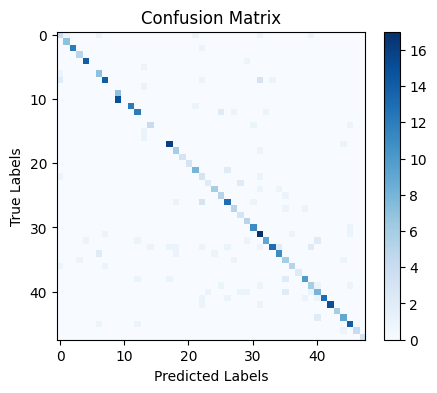

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Upload dataset manually in Google Colab
from google.colab import files
uploaded = files.upload()  # This will prompt file selection

# Load dataset (Assuming it is in CSV format)
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name)

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Assume last column is the target, all others are features
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Initialize and train MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_model.fit(X_train, Y_train)

# Make predictions
Y_pred = mlp_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(5,4))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
